 # Student Performance in Exams

#### Aim: Is to identify factors that influence student performance in examinations, visualize this factors and use machine learning
#### to model and predict student performances.
    
    I will be looking at the following:
        1. what are the major factors affecting student grades;
        2. which subject are best performed by genders;
        3. impact of preparation for exams
        4. impact of parent degrees on student grades
        5. races performances
        6. machine learning training, testing and predictions.

In [1]:
# importing the neccessary libraries needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# reading the dataset to be used in (note it is in csv)
df = pd.read_csv("exams.csv")

# Inspecting the data

### In this section I will inspect the data to ensure well information without bias.

In [3]:
#viewing the head of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
#use the info method to inpecct the data further, this give the data types of each features and instances of the data, also stating
# if data has none values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#this attribute enable me to see the shape of the dataframe. This returns a tuple, which represent the dimensionality of the dataframe
df.shape

(1000, 8)

In [6]:
# this help to quickly view the statistical representation of the data returning the mean, std, count, min, max and percentile
# of the numerical column in the dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
#checking for missing information on the dataset: No missing row / information
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
#calculating the average score and assigning it a column.
df = df.assign(avg_score = lambda x: (x['math score'] + x['reading score'] + x['writing score'])/3)

#rounding the average score to whole number
df['Total Score'] = df['avg_score'].round().astype(int)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score
0,male,group A,high school,standard,completed,67,67,63,65.666667,66
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,51
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,56
3,male,group B,high school,standard,none,77,78,68,74.333333,74
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,73


In [10]:
# Defining all the conditions inside a function and generating the grades for each students
def condition(x):
    if x>79:
        return "A"
    elif x>=60 and x<=79:
        return "B"
    elif x>=50 and x<=59:
        return "C"
    elif x>=45 and x<=49:
        return "D"
    elif x>=40 and x<=44:
        return "E"
    else:
        return 'F'
 
# Applying the conditions
df['Grades'] = df['Total Score'].apply(condition)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score,Grades
0,male,group A,high school,standard,completed,67,67,63,65.666667,66,B
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,51,C
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,56,C
3,male,group B,high school,standard,none,77,78,68,74.333333,74,B
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,73,B


In [12]:
# Adding the result column to separate the passmark from failed mark
# passmark is 40
df['Result'] = df['Total Score'].apply(lambda x: '1' if x>=40 else '0')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,Total Score,Grades,Result
0,male,group A,high school,standard,completed,67,67,63,65.666667,66,B,1
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,51,C,1
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,56,C,1
3,male,group B,high school,standard,none,77,78,68,74.333333,74,B,1
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,73,B,1


In [13]:
# Convert the 'object' dtype column to 'int' dtype
df['Result'] = df['Result'].astype(int)
df['Result'].dtype

dtype('int32')

# Exploratory Data Analysis

<Axes: xlabel='parental level of education', ylabel='count'>

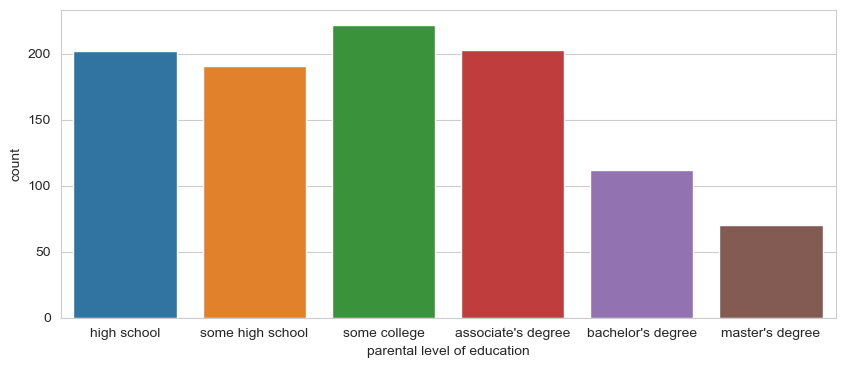

In [16]:
#to count the number of each schools went by parents
# from the chart must parent end at some college degree and least went as high as attaining their master degree
# We are going to explore this later to discover the performance of each student under this category to their overall score
plt.figure(figsize=(10,4))
sns.countplot(x='parental level of education', data=df)

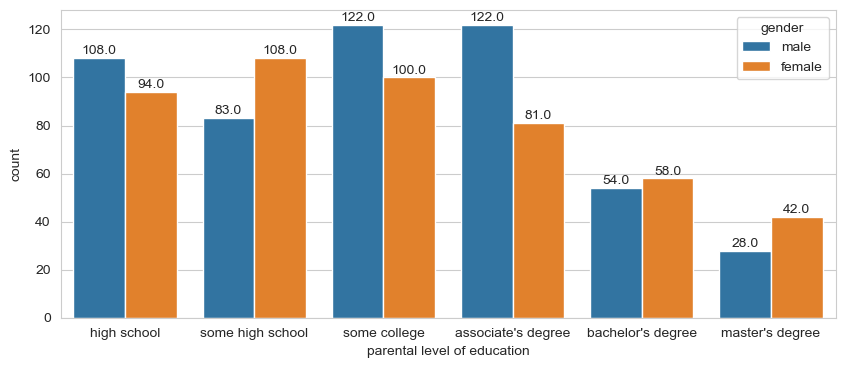

In [17]:
# the parental education statues is further broken to display the number gender in each statues
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df['parental level of education'], data=df, hue='gender')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


<Axes: xlabel='parental level of education', ylabel='Total Score'>

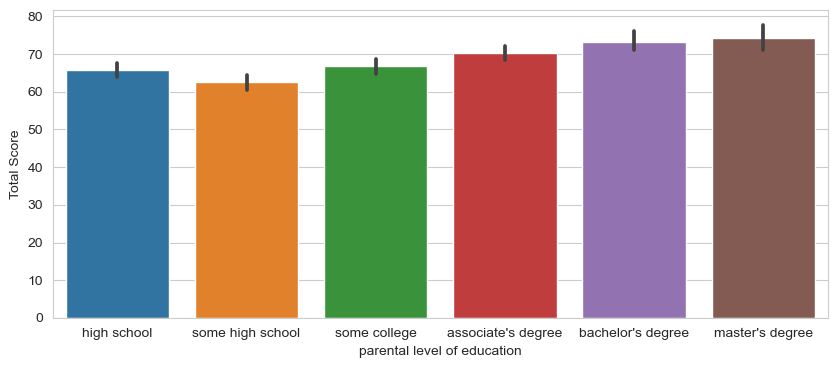

In [18]:
#Display the parateal education statues of children total score
plt.figure(figsize=(10,4))
sns.barplot(x='parental level of education', y='Total Score', data=df)

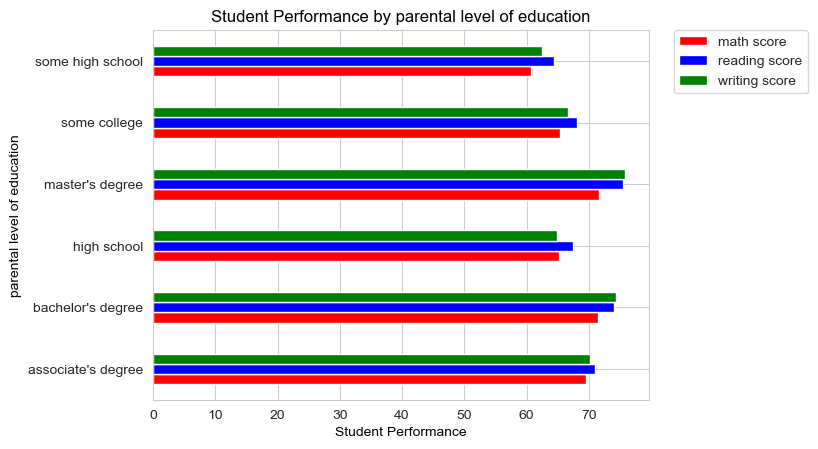

In [27]:
# student performance for each scores by parent performance
df[["math score","reading score","writing score", "parental level of education"]].groupby("parental level of education").mean().plot(kind="barh",color=["red","blue","green"])

plt.legend(fontsize=7)
plt.title("Student Performance by parental level of education",color="black")
plt.xlabel("Student Performance",color="black")
plt.ylabel("parental level of education",color="black")

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

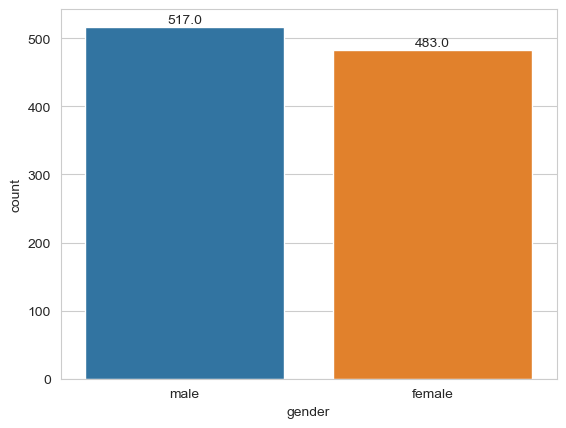

In [19]:
# to know the number of males and females
ax3=sns.countplot(x=df["gender"], data=df)
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


<Axes: xlabel='gender', ylabel='math score'>

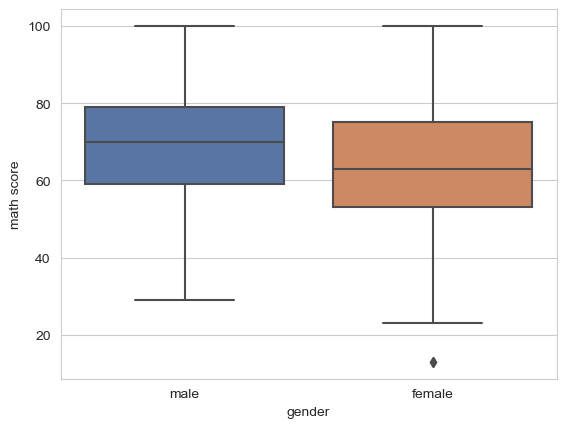

In [20]:
# to check out gender performace in math class
sns.boxplot(x="gender", y=df["math score"], data=df,palette='deep')

<Axes: xlabel='gender', ylabel='reading score'>

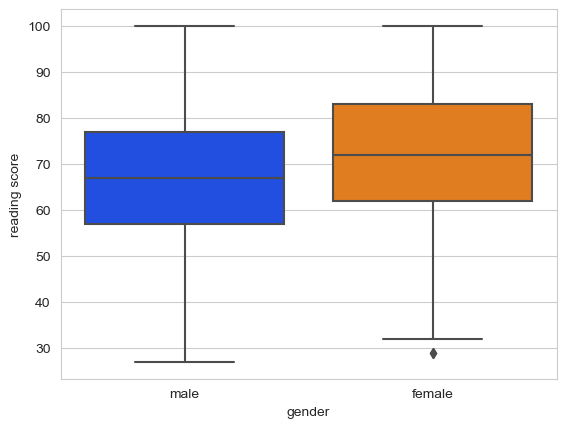

In [21]:
# to check out gender performace in reading class
sns.boxplot(x="gender", y=df["reading score"], data=df,palette='bright')

<Axes: xlabel='gender', ylabel='writing score'>

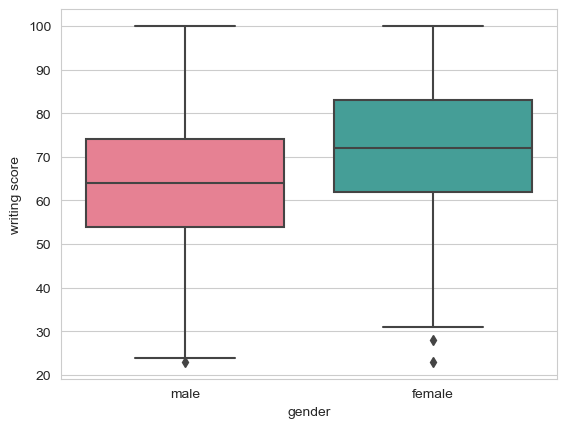

In [22]:
# to check out gender performace in writing class
sns.boxplot(x="gender", y=df["writing score"], data=df,palette='husl')

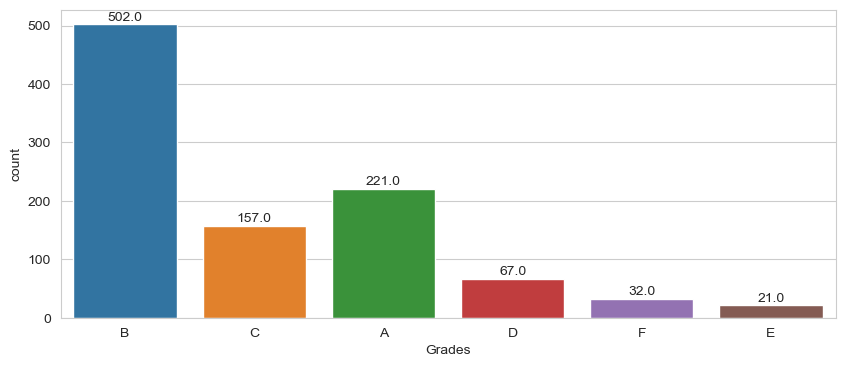

In [24]:
#counting the highest grades obtained by student
plt.figure(figsize=(10,4))
ax1=sns.countplot(x=df['Grades'], data=df)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

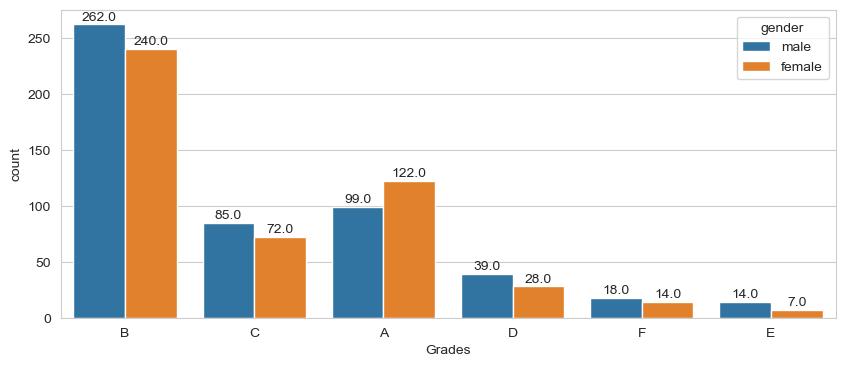

In [25]:
# plotting the grades by genders
plt.figure(figsize=(10,4))
ax1=sns.countplot(x=df['Grades'], data=df, hue = 'gender')
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Student Performance By Race

In [22]:
ax4=df[["math score","reading score","writing score" ,"race/ethnicity"]].groupby("race/ethnicity").mean()
ax4

,math score,reading score,writing score
race/ethnicity,,,
group A,65.215190,68.556962,66.974684
group B,63.170732,67.102439,65.736585
group C,63.130031,66.383901,64.523220
group D,69.267176,72.087786,72.259542
group E,74.465649,72.526718,70.213740


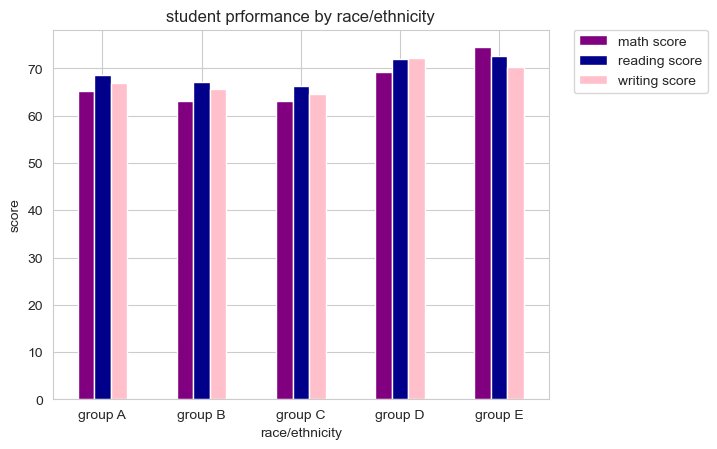

In [26]:
axs=df[["math score","reading score","writing score" ,"race/ethnicity"]].groupby("race/ethnicity").mean().plot(kind="bar",color=["purple","darkblue","pink"],
                                                                                              title="student prformance by race/ethnicity", xlabel ="race/ethnicity", ylabel="score")
plt.xticks(rotation=0)

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Student Performance by Lunch

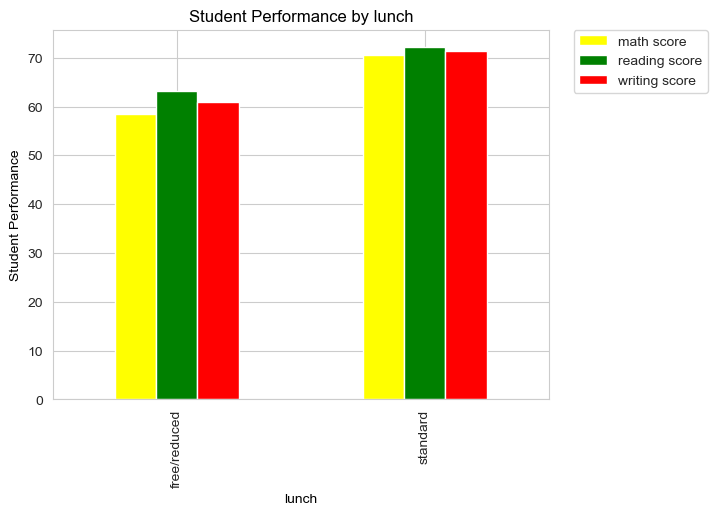

In [40]:
df[["math score","reading score","writing score", "lunch"]].groupby("lunch").mean().plot(kind="bar",color=["yellow","green","red"])

                                                                                                           
plt.legend(fontsize=5)
plt.title("Student Performance by lunch",color="black")
plt.xlabel("lunch",color="black")
plt.ylabel("Student Performance",color="black")


# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xticks(rotation=0)

//What are the 24 colours?
Pin on Colors Names
Reds: crimson, maroon, scarlet.
Oranges: amber, rust, salmon.
Yellows: gold, lemon, mustard.
Greens: emerald, lime, olive.
Blues: azure, indigo, teal.
Purples: lavender, magenta, violet.
Browns: beige, chocolate, sienna.
Grays: charcoal, silver, slate
Black Grey Red Blue Orange White Brown Pink Yellow Green Purple Maroon Turquoise Cyan//

# Student Performance by Test Preparation

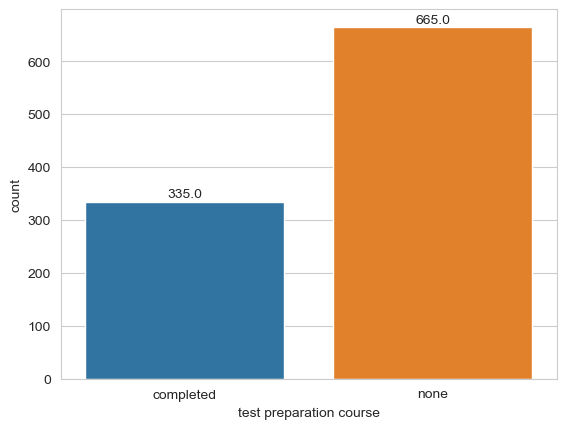

In [28]:
#count the total number of student who prepared and who do not prepared for the exam
# plot barplot 
ax4 = sns.countplot(x="test preparation course", 
           data=df)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


In [29]:
# plot barplot 
#ax5 = sns.barplot(x="test preparation course", 
          # y="reading score",  
          # data=df)
#for p in ax5.patches:
   # ax5.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
              #  ha='center', va='center', xytext=(0, 5), textcoords='offset points')


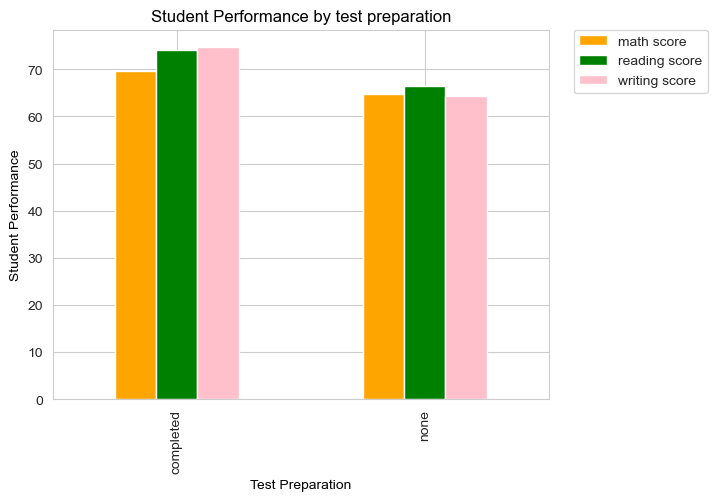

In [30]:
df[["math score","reading score","writing score", "test preparation course"]].groupby("test preparation course").mean().plot(kind="bar",color=["Orange","green","pink"])

                                                                                                           
plt.legend(fontsize=5)
plt.title("Student Performance by test preparation",color="black")
plt.xlabel("Test Preparation",color="black")
plt.ylabel("Student Performance",color="black")


# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xticks(rotation=0)

# Conclusion

From the analysis above, the dataset used is a very good dataset with no bias in each column. It does not contained null values and it is very detailed and complete.

The analysis result indicate that student performance in examinations are direct proportional to their level of preparedness, level of parent education, how well they are fed, ethinic group and gender personality.

From pyschology male are more critical and logical than female. it is shown in this analysis when compared genders with grades in each subjects, the male genders outperformed the female gender in Maths. And the female genders outperformed the male genders in reading and writing.

Children whose parent had higher degrees (Masters) performed excellently well above others students whose parents had lesser educational level. This shows that parental level of education have significant effects on their child performance at school.

As the saying goes "Health is wealth" I will say "Feeding well leads to is Excellent performance in all things". When children are well fed it recipocate in their performance at school and in education centre. It increases their attentiveness and make them concentrate even further in their studies.

# Recommendation

Machine learning will be deployed in the future analyses.